# But before all of this, I have one hypothesis that the Perceptron Learning Algorithm will not exhibit following behavious:

Normally with gradient descent optimizer, if the learning rate is too high, the weights oscillate around the local minima, without settling down/ or taking a lot of time to settle, as can be seen in the attached image: [image](https://i.stack.imgur.com/0tirm.png) (not mine)

![alt text](https://i.stack.imgur.com/0tirm.png "Title")

    This effect can be put under microscope if we were to check accuracy on a sample by sample basis.

    In this article, we are going to learn about the most basic machine learning algorithm that you can ever come across.

    I have found this algorithm to be incredible fundamental as in it teaches you: what it means to "learn" from data, first hand. The speciality of this algorithm, to me atleast, is that it does not require an Optimizer to correct its predictions.

        1) What do I mean when I say it does not require an optimizer to learn?
        2) What are the implications of not having an (formal?) optimizer implications?
    
    We shall find out shortly but let's first code the algorithm.

In [1]:
from __future__ import division
import numpy as np
import pandas as pd
np.random.seed(42)

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = (10, 8)

    The algorithms works the best if the data is linearly separable. So, we are going to simulate the data for this task using numpy and will separate a half of the data in every axis from the rest.
    
    We are going to take 2000 samples (with 80-20 :train-test split), with 16 features. This numbers are all random. Even the data itself is random but this article is about the Perceptron Learning Algorithm not data.

In [5]:
### Generate data

n_samples, n_features = 2000, 16
n_train, n_test = 1600, 400

#generate data of shape = (n_sample, n_feature) using random function
data = np.random.random(size=(n_samples, n_features))


# We need to shift all columns of some random rows by some margin so that the data points become linearly separable.

# Get random rows

#create random array of 0s and 1s 
mask = np.random.randint(0, 2, 2000)

#create bool valued mask array
mask = mask==1.0

#get margin by which to shift
margin = 1.0


# shift by margin
data[mask]+=margin



#create fake column names:
columns=["Feature{}".format(i) for i in range(n_features)]
df = pd.DataFrame(data=data, columns=columns)



#use mask as label
df['label'] = mask

for _ in range(10):
    df = df.sample(frac=1.0)
df.reset_index(inplace=True, drop=True)

In [6]:
df

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,label
0,1.866415,1.021807,1.679554,1.547968,1.169558,1.817476,1.368885,1.293802,1.828125,1.638525,1.898259,1.629884,1.740818,1.836446,1.054740,1.776049,True
1,1.122253,1.425164,1.943631,1.500745,1.635259,1.624162,1.132573,1.390297,1.706939,1.971990,1.168018,1.410442,1.095094,1.242376,1.376759,1.540643,True
2,1.280935,1.542696,1.140924,1.802197,1.074551,1.986887,1.772245,1.198716,1.005522,1.815461,1.706857,1.729007,1.771270,1.074045,1.358466,1.115869,True
3,1.498355,1.822283,1.183329,1.334412,1.686376,1.246684,1.439845,1.963734,1.625876,1.949057,1.722441,1.724667,1.591857,1.142209,1.519714,1.252666,True
4,0.342720,0.756041,0.228809,0.624796,0.704843,0.741121,0.207172,0.848726,0.420972,0.216370,0.542531,0.863357,0.967088,0.748208,0.005623,0.134701,False
5,0.806210,0.888432,0.851289,0.433367,0.758674,0.097579,0.040245,0.753236,0.425355,0.995549,0.097254,0.855628,0.479983,0.827150,0.817127,0.915992,False
6,0.498896,0.012103,0.009038,0.357029,0.926194,0.228677,0.634364,0.222076,0.321670,0.848042,0.728861,0.095399,0.428702,0.029170,0.480890,0.662434,False
7,1.021081,1.858650,1.919430,1.353548,1.719502,1.442104,1.655232,1.340317,1.322559,1.424434,1.145568,1.831139,1.348698,1.400150,1.894055,1.496624,True
8,0.158655,0.531857,0.281519,0.096244,0.466958,0.590109,0.046906,0.402093,0.257662,0.030651,0.125663,0.139034,0.182874,0.803378,0.439492,0.147086,False
9,0.082799,0.603152,0.245349,0.389296,0.288694,0.355673,0.719046,0.297122,0.566405,0.476050,0.663671,0.936830,0.732572,0.214940,0.031183,0.262264,False


In [7]:
# The data is now ready
# df

In [8]:
#sanity-check regarding randomness 
df.iloc[1600:]['label'].sum()

210

### Scale features?

In [9]:
ddx = pd.DataFrame(df, copy=True)

In [10]:
ddx[ddx.columns[:-1]] = StandardScaler().fit_transform(ddx[ddx.columns[:-1]])

# Train on scaled data

In [11]:
#split data
train = ddx.iloc[:n_train]
test = ddx.iloc[n_train:]

In [12]:
train.shape, test.shape

((1600, 17), (400, 17))

In [13]:
#let's create the Perceptron Learning Algorithm here:

In [14]:
def beautify():
    """
    For good printing
    """
    print "__"*42+"\n"

class PerceptronAlgorithm():
    
    def __init__(self,
                 n_features=n_features,
                 learning_rate=0.01,
                 n_epochs = 2,
                 normalise_wt=False
                ):
        """
        The Perceptron Classifier
        Has weights W; a hyperplane
        """
        self.normalise_wt = normalise_wt #whether to l2 normalize weight or not
        self.w = np.random.normal(size=(n_features+1)) #+1 for bias; randomly initialise the array
        if self.normalise_wt:
            self.w = self.normalise_weights(self.w)
        self.n_epochs = n_epochs
        self.learning_rate = learning_rate
        print "Current random weights:\n\n", self.w, "\n"
        print "Epochs:", self.n_epochs, "\n"
        print "Learning Rate:", self.learning_rate, "\n"
        beautify()
    
    def normalise_weights(self, wts):
        """
        L2 normalization
        """
        return wts/sum(np.square(wts))
    
    def prep_input(self, arr):
        """
        prepare the input sample data, add another dimension for bias into the input
        """
        return np.hstack([arr, [1.0]])
    
    def get_pred(self, sample):
        """
        On what side of the hyperplane?
        """
        return np.dot(sample, self.w) > 0
    
    def get_sign(self, pred, out):
        if pred==False and out==True:
            return 1.#pull the hyperplane near the data point
        return -1.#push the hyperplane away from data point
    
    def softmax(self, _data):
        """
        Useless for dealing with weights and features
        """
        _data = np.array(_data, dtype=np.float32)
        return np.exp(_data)/sum(np.exp(_data))
    
    def _change_weights(self,_data, sign):
        #Application of softmax is SO wrong here!! Why, you might ask.
        #Because softmax for [1.0, 1.0] is same as [2.0, 2.0] It's trying to project each vector to N-d sphere
        #if self.normalise_data:
        #    _data = self.softmax(_data)
        self.w = self.w + (self.learning_rate*sign*_data)
        if self.normalise_wt:
            self.w = self.normalise_weights(self.w)
    
    def pred_batch(self, data):
        acc = 0.0
        for j, _data in enumerate(data.values):
            _data, out = self.prep_input(_data[:-1]), _data[-1]
            pred = self.get_pred(_data)
            acc+=int(pred==out)
        acc/=len(data)
        return acc

    
    def train(self, data, plot_acc=False):
        if len(np.shape(data))!=2:
            raise ValueError("Invalid shape of data!!!")
        
        if not isinstance(data, pd.DataFrame):
            raise TypeError("Not a dataframe!")
            
        acc = 0.0
        try:
            acc = self.pred_batch(data)
        except:
            raise
        print "Accuracy before training", acc
        
        print "Training model...\n\n"
        beautify()

        #inumerate over samples
        batch_acc = []
        for i in range(self.n_epochs):
            for j, _data in enumerate(data.values):
                #prepare input and extract output
                _data, out = self.prep_input(_data[:-1]), _data[-1]
                pred = self.get_pred(_data)
                if pred==out:
                    #if correct prediction
                    continue
                
                #sign tells what to do with the hyperplane 
                sign = self.get_sign(pred, out)
                
                #change weights
                self._change_weights(_data, sign)

                #print batch accuracy
                acc = self.pred_batch(data)
                batch_acc.append(acc)
                #if acc = 1.0:
                #    break
            
            acc = self.pred_batch(data)
            print "batch training acc:", acc
        
        print "training finished!"
        beautify()
        print "Changed weights", self.w
        beautify()
        return batch_acc
    
    def predict(self, sample):
        sample = self.prep_input(sample)
        return self.get_pred(sample)
    

In [15]:
learning_rates = [0.0005, 0.002, 0.001,0.01, 0.02, 0.1, 0.2, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0,7.5 ,10.0, 20.0, 25.0]

### Train model with scaled features for different learning rates without l2 normalising weights after each update: the most basic learning rule

Current random weights:

[ 0.49128927  1.24106837 -0.9555651  -1.29398215 -0.57396673 -0.73559325
 -0.82540957  1.44490644  0.14841587  1.97239346 -0.00307042 -1.17187645
 -0.80817458  1.02445535 -1.13385174  0.55787664 -0.35675253] 

Epochs: 16 

Learning Rate: 0.0005 

____________________________________________________________________________________

Accuracy before training 0.399375
Training model...


____________________________________________________________________________________

batch training acc: 0.85875
batch training acc: 0.934375
batch training acc: 0.955625
batch training acc: 0.97375
batch training acc: 0.98
batch training acc: 0.985625
batch training acc: 0.99
batch training acc: 0.99125
batch training acc: 0.991875
batch training acc: 0.99375
batch training acc: 0.99375
batch training acc: 0.99375
batch training acc: 0.994375
batch training acc: 0.995
batch training acc: 0.995
batch training acc: 0.995
training finished!
__________________________________________

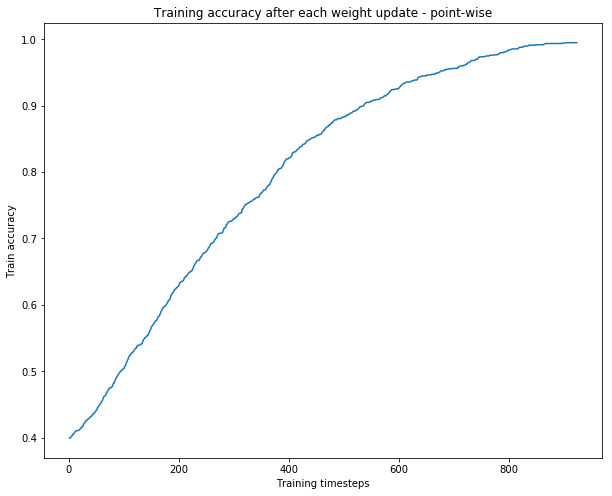

Current random weights:

[-0.92982557  1.38651973 -0.58856604 -0.82757102 -0.07889308 -0.50823769
  2.2149859   1.06035729 -0.59069242 -0.47533711 -2.01944828  0.13740365
 -0.74705934  0.08801138 -1.96627409 -0.02675634  1.69867131] 

Epochs: 16 

Learning Rate: 0.002 

____________________________________________________________________________________

Accuracy before training 0.118125
Training model...


____________________________________________________________________________________

batch training acc: 0.96
batch training acc: 0.984375
batch training acc: 0.995
batch training acc: 0.995625
batch training acc: 0.99625
batch training acc: 0.996875
batch training acc: 0.9975
batch training acc: 0.998125
batch training acc: 0.998125
batch training acc: 0.998125
batch training acc: 0.998125
batch training acc: 0.99875
batch training acc: 0.99875
batch training acc: 0.99875
batch training acc: 0.99875
batch training acc: 0.99875
training finished!
___________________________________

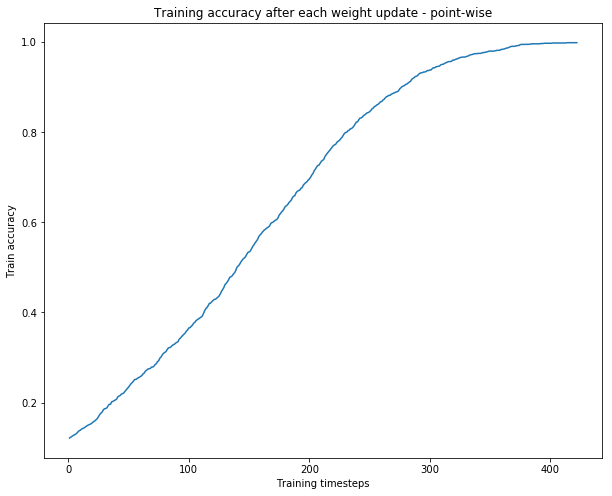

Current random weights:

[ 0.05414116 -0.77468219 -0.02046672 -0.06424874  2.19183314 -0.33284193
 -1.2032933   0.02145817  0.19553324  0.56229597  0.75576185  1.95552609
 -0.5956637  -0.68654974 -1.85413648  0.66165377 -0.88731437] 

Epochs: 16 

Learning Rate: 0.001 

____________________________________________________________________________________

Accuracy before training 0.639375
Training model...


____________________________________________________________________________________

batch training acc: 0.93125
batch training acc: 0.96875
batch training acc: 0.9825
batch training acc: 0.98625
batch training acc: 0.99
batch training acc: 0.9925
batch training acc: 0.994375
batch training acc: 0.995625
batch training acc: 0.99625
batch training acc: 0.99625
batch training acc: 0.9975
batch training acc: 0.998125
batch training acc: 0.998125
batch training acc: 0.998125
batch training acc: 0.99875
batch training acc: 0.99875
training finished!
_____________________________________

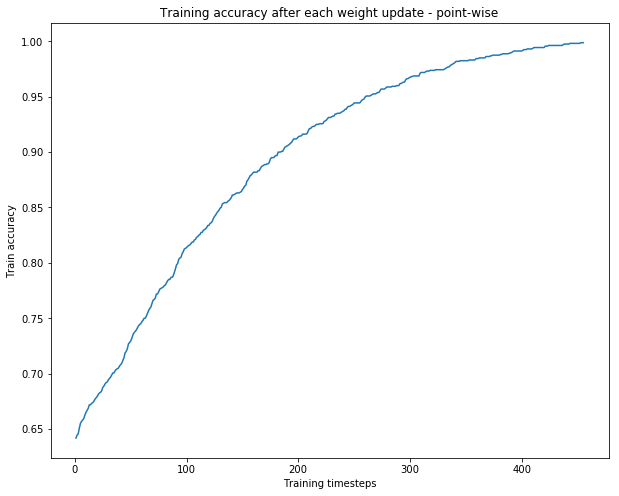

Current random weights:

[ 0.89176428 -0.49163491  1.72595797 -1.43350689  1.0229255   0.90384256
  0.52657644 -1.1172637   0.53115082  0.12687474 -1.83025621  1.55827299
 -0.34561142  1.4812177  -0.06766145  0.98232606 -0.85952511] 

Epochs: 16 

Learning Rate: 0.01 

____________________________________________________________________________________

Accuracy before training 0.951875
Training model...


____________________________________________________________________________________

batch training acc: 0.995625
batch training acc: 0.9975
batch training acc: 0.998125
batch training acc: 0.99875
batch training acc: 0.999375
batch training acc: 0.999375
batch training acc: 0.999375
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
_____________________________________________________________________

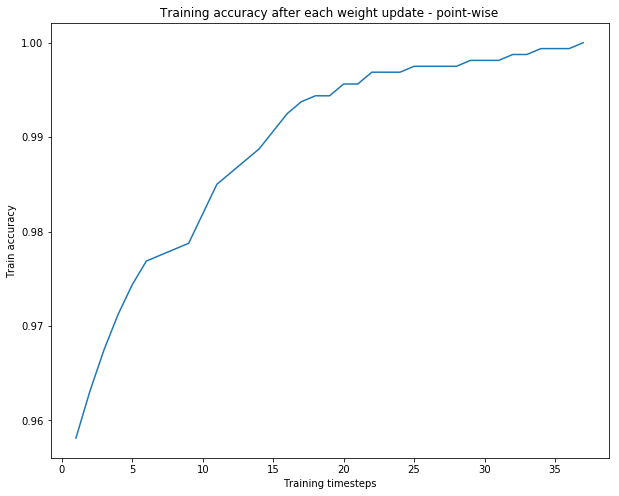

Current random weights:

[ 0.21443495  0.14394199 -0.32360103 -0.86922281 -3.06680073 -0.84575941
  0.70050911 -1.39522955 -1.18813364 -1.43486281  0.20888812 -0.89340659
  1.22034298  0.73461971  0.20012406  0.30394967 -0.76294807] 

Epochs: 16 

Learning Rate: 0.02 

____________________________________________________________________________________

Accuracy before training 0.005625
Training model...


____________________________________________________________________________________

batch training acc: 0.9975
batch training acc: 0.999375
batch training acc: 0.999375
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Ch

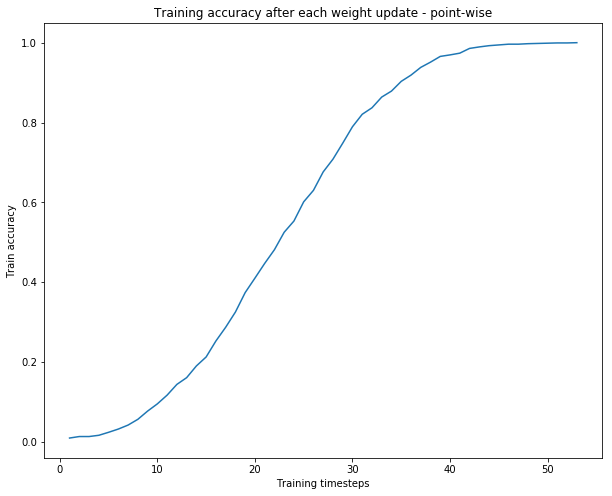

Current random weights:

[-0.76269263  0.71102655  0.91339202  0.70226237 -0.47058266 -0.39132208
 -0.93175678  0.76825384 -1.96145556 -2.2042363  -2.00485937 -2.14268928
  1.3571409   0.78680536 -1.1985966  -0.10593291  1.46579037] 

Epochs: 16 

Learning Rate: 0.1 

____________________________________________________________________________________

Accuracy before training 0.025625
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights 

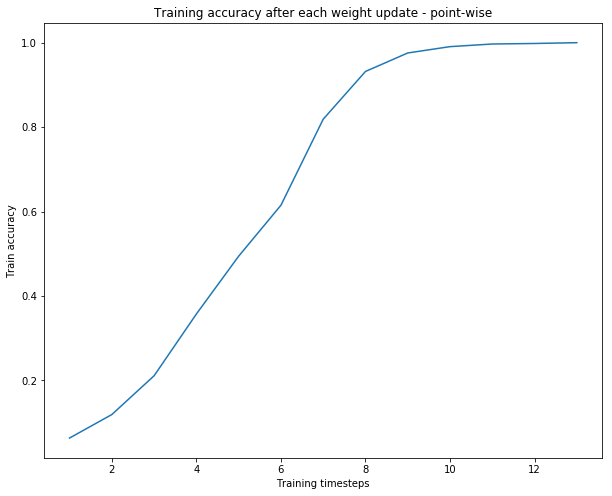

Current random weights:

[ 0.50019862  2.11437627 -0.11426613 -0.65515895 -1.08110917  0.02364466
  0.93606439  0.09912503 -0.358195    1.25652044  0.5288921  -0.1134365
 -0.76659127 -0.25444279  0.47274722 -0.78034888 -1.23365294] 

Epochs: 16 

Learning Rate: 0.2 

____________________________________________________________________________________

Accuracy before training 0.75875
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights [0

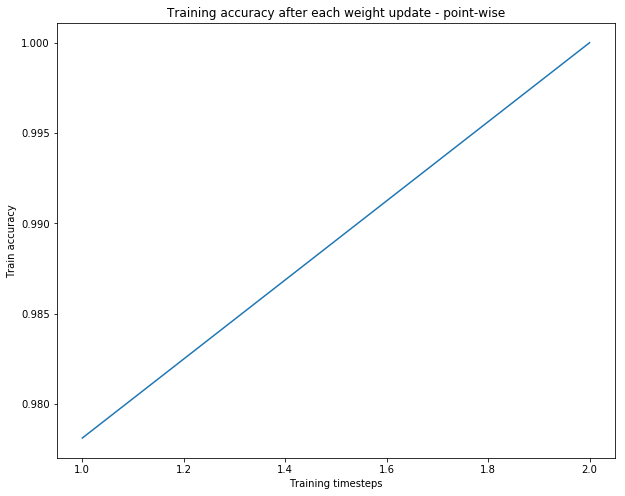

Current random weights:

[-0.48015126 -0.04920969  1.36329017 -1.16003737  0.2267481  -0.27757147
 -0.22794079  1.5393663   0.08121214 -0.91355491  0.88874672  0.81524068
 -1.00117111 -1.19293673  0.41051972 -0.03296892 -0.4705827 ] 

Epochs: 16 

Learning Rate: 0.5 

____________________________________________________________________________________

Accuracy before training 0.47875
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights [

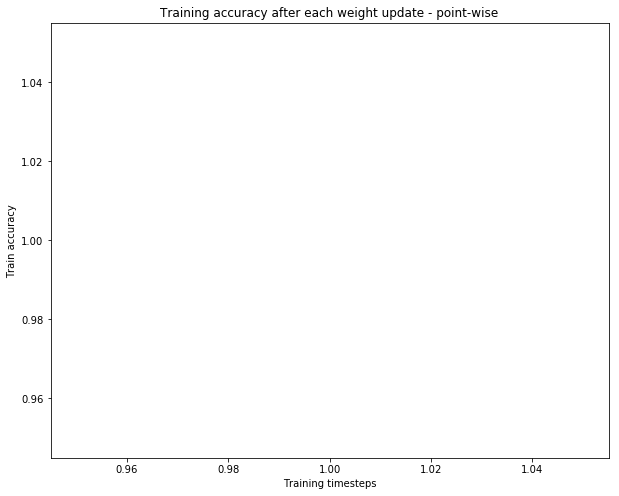

Current random weights:

[ 1.05629851 -0.5922807   0.4215629   1.17464437 -0.33913086 -1.82909873
 -0.40306778  0.18928374  1.00300594 -0.52116069  1.72309345 -1.29882238
  0.16414366 -0.23916303  1.34709089 -1.47364718  0.42563476] 

Epochs: 16 

Learning Rate: 0.75 

____________________________________________________________________________________

Accuracy before training 0.564375
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights

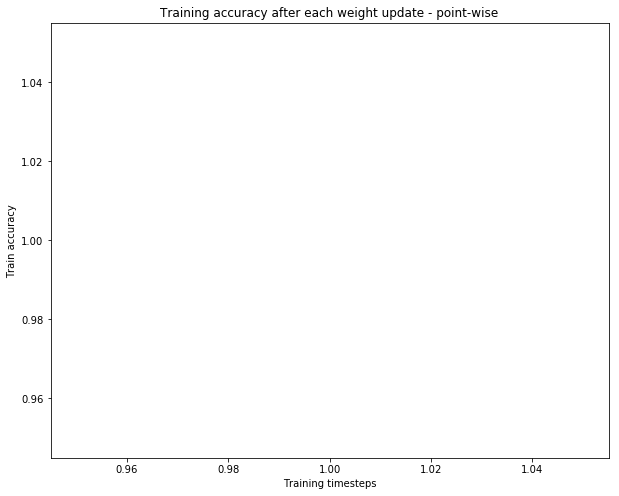

Current random weights:

[-0.24423163  1.52914095 -0.82855868  0.41531826 -0.83819154  0.18806218
 -0.36936487 -0.38522976 -1.9874353   0.41458406 -1.08223914 -1.11667962
 -1.55528341 -1.05604936  0.50047977  0.45117329  0.66371096] 

Epochs: 16 

Learning Rate: 1.0 

____________________________________________________________________________________

Accuracy before training 0.003125
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights 

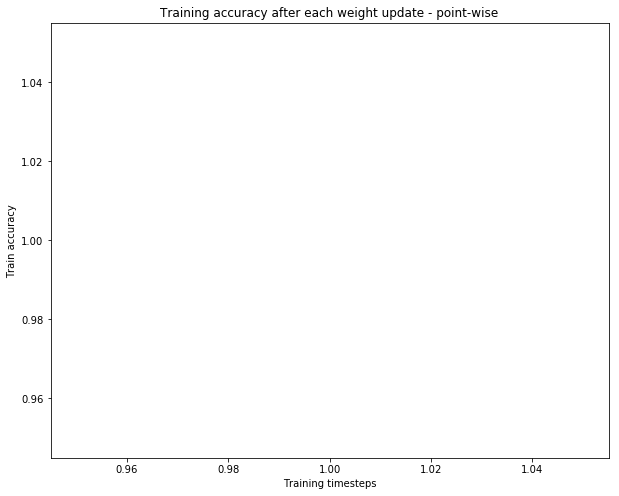

Current random weights:

[-1.02698089  0.21478163 -0.61538353  0.95472969  0.42601395 -0.65651833
  1.04057554  0.50734434 -1.38700283 -1.67152218 -1.34768582  1.64918172
 -1.01546263  1.87614021 -1.06731858 -1.17386506  0.87995248] 

Epochs: 16 

Learning Rate: 1.5 

____________________________________________________________________________________

Accuracy before training 0.136875
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights 

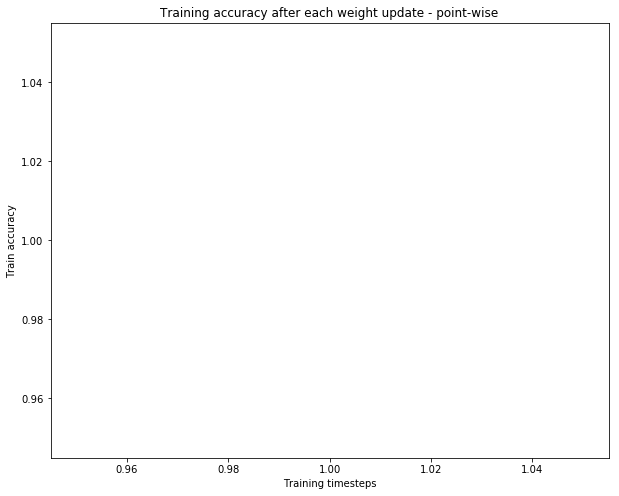

Current random weights:

[ 0.92552331  0.55582517  0.67611029 -0.80162178  0.8330032   0.23999667
 -0.36527539  0.0946199   1.06064582  0.3918506  -2.15780209  0.89122787
  0.81463871 -0.37906468  0.11674829  0.11273975 -1.97945958] 

Epochs: 16 

Learning Rate: 2.0 

____________________________________________________________________________________

Accuracy before training 0.80875
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights [

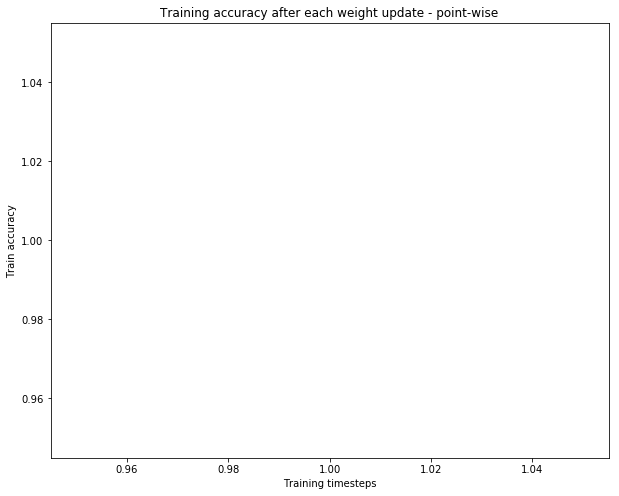

Current random weights:

[-0.40167031 -0.36297708 -0.15872687 -0.52584776  0.66284177 -0.8091289
  0.91007717  0.61574208  1.36041839  1.73379903  1.74045182 -1.18561796
  0.34418584 -0.71778626  3.28029959  0.61407136  1.41631199] 

Epochs: 16 

Learning Rate: 2.5 

____________________________________________________________________________________

Accuracy before training 0.989375
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights [

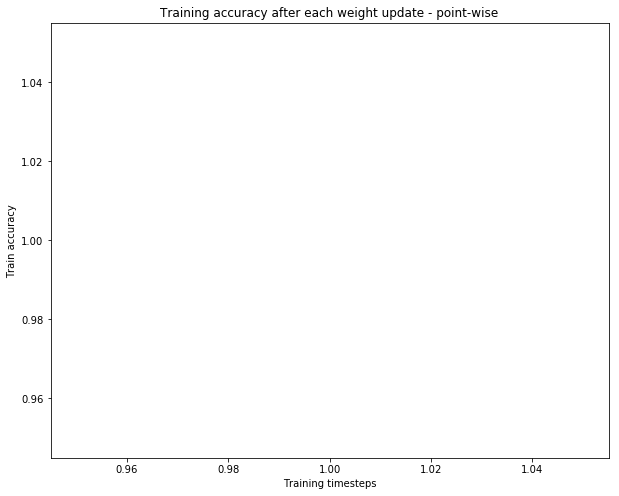

Current random weights:

[ 0.4353695  -2.63544309 -0.78356503 -0.68558294 -0.39013528  0.3595683
  0.50133272 -2.62733644 -0.23691956 -0.48587612  1.38103832  0.5922446
 -0.18307752  0.22368082 -1.68702304  0.66135204 -0.39553892] 

Epochs: 16 

Learning Rate: 3.0 

____________________________________________________________________________________

Accuracy before training 0.02125
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights [0.

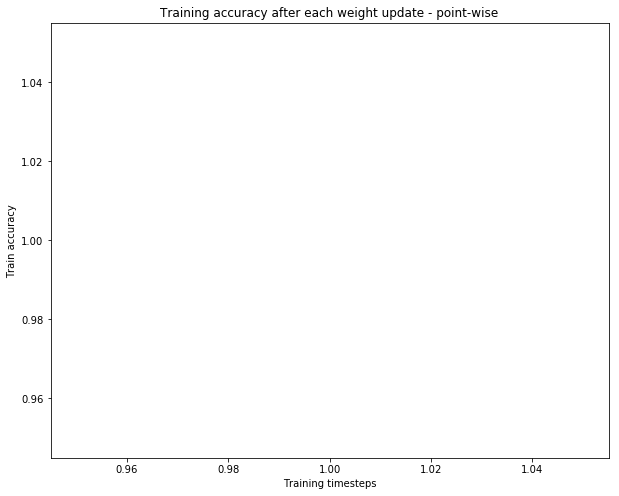

Current random weights:

[-0.80737877  1.31423184  0.27358082 -0.66543093 -0.60439315  0.36590634
  0.2881713   0.02942505 -1.20335639 -1.05546402 -0.74831398 -0.19614643
 -0.04131106 -0.15997103 -0.11424496  1.8812456   0.84925009] 

Epochs: 16 

Learning Rate: 4.0 

____________________________________________________________________________________

Accuracy before training 0.254375
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights 

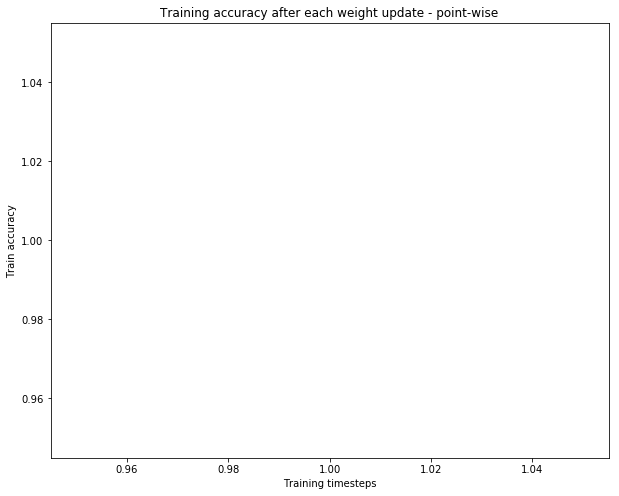

Current random weights:

[ 1.18821676  0.46426399  0.07240267  0.40995824  0.22582017  0.80797821
 -0.97514047  0.72474709  0.16705867 -1.80708704  0.08572169 -1.3062178
 -0.53499767 -0.15919066 -1.50710187 -0.05374118  0.06846808] 

Epochs: 16 

Learning Rate: 5.0 

____________________________________________________________________________________

Accuracy before training 0.136875
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights [

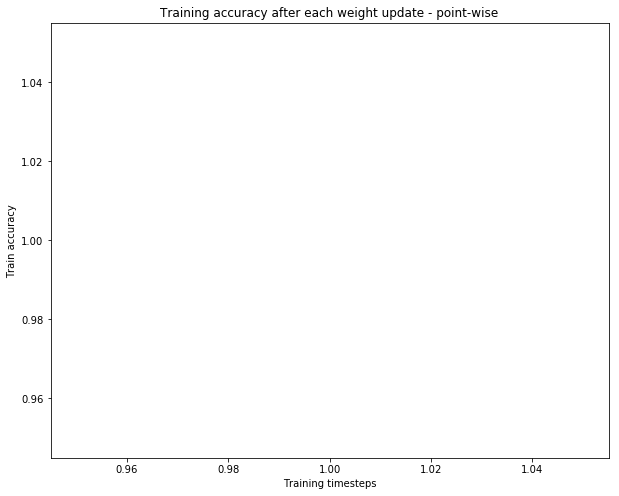

Current random weights:

[ 0.75507373 -0.45376535  0.274475   -0.09541275 -0.41827074 -1.6705773
 -0.11160031  0.7445125  -0.93371679 -0.21778386 -0.07048733  1.10244063
  0.03010782  0.28808738 -0.00865605 -0.49230582 -1.13447392] 

Epochs: 16 

Learning Rate: 7.5 

____________________________________________________________________________________

Accuracy before training 0.276875
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights [

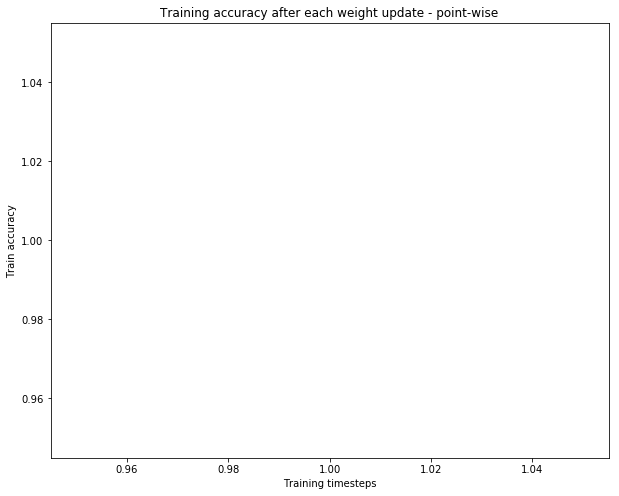

Current random weights:

[-0.2850721   0.3933593   0.12307637  1.47951693  0.94585204  1.2405579
 -2.03227661  1.57933425  0.2668116   0.40892546  0.89602735  0.02131731
 -1.07038055  1.44740763 -0.76822206 -0.98571738 -0.23430092] 

Epochs: 16 

Learning Rate: 10.0 

____________________________________________________________________________________

Accuracy before training 0.946875
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights 

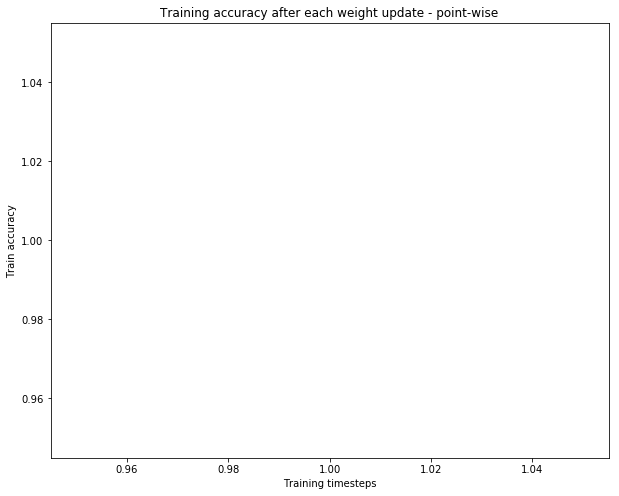

Current random weights:

[-0.38600393  0.00380683 -0.09820828  1.34712977  0.4593226  -0.85779698
 -0.72050426 -0.38818865 -0.384201   -0.51474414 -1.10174202  0.29040214
 -0.4556045  -0.95180146  0.4854752   0.847822   -0.2456371 ] 

Epochs: 16 

Learning Rate: 20.0 

____________________________________________________________________________________

Accuracy before training 0.061875
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights

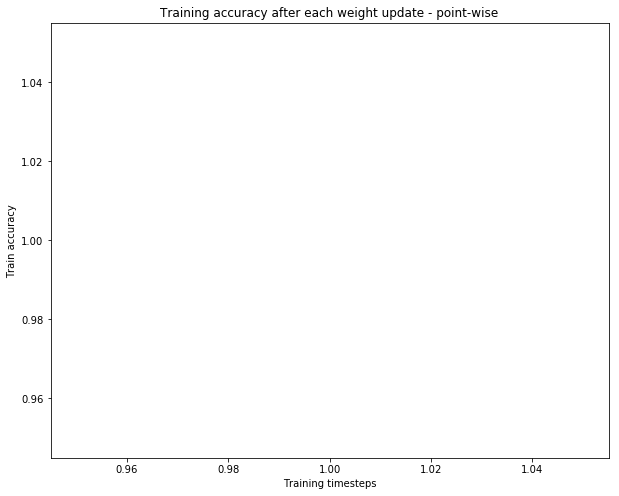

Current random weights:

[ 1.78148636  2.2155207   0.49689015 -0.46881072  0.26895355 -1.22444307
 -0.87186361 -1.68268914 -0.62846498 -1.23252025  0.62405673 -0.74915853
  0.27662129  0.74790644  1.17134241 -0.35342454  0.3106375 ] 

Epochs: 16 

Learning Rate: 25.0 

____________________________________________________________________________________

Accuracy before training 0.56
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights [39

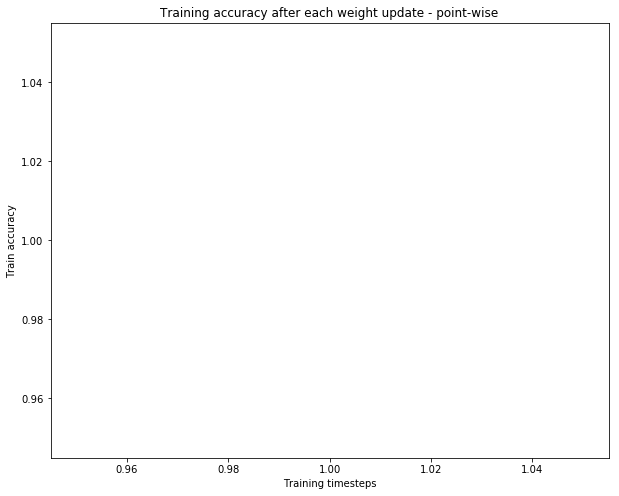

In [16]:
normalise_wt = False
acc_vectors = []
test_accs = []
for learning_rate in learning_rates: 
    n_epochs = 16
    pl = PerceptronAlgorithm(learning_rate=learning_rate, n_epochs=n_epochs, normalise_wt=normalise_wt)
    acc_data = pl.train(train)
    acc_vectors.append(acc_data)
    test_acc = pl.pred_batch(test)
    test_accs.append(test_acc)
    print "Testing accuracy:", test_acc
    beautify()
    print "length of acc vector: tell you about the number of updates made by the model", len(acc_data)
    beautify()
    plt.plot(range(1, len(acc_data)+1), acc_data)
    plt.xlabel('Training timesteps')
    plt.ylabel('Train accuracy')
    plt.title('Training accuracy after each weight update - point-wise')
    plt.show()
acc_vectors_wn = acc_vectors
test_accs_wn = test_accs

### Train model with scaled features for different learning rates and l2 normalise weights after each update: simple modification to learning rule

### Train model with l2 normed weights

Current random weights:

[ 0.02326821  0.08642089  0.05323186  0.08854414 -0.11308988 -0.04512796
  0.07009758  0.0394506  -0.0084951  -0.03220509  0.05358013 -0.13448469
  0.05381836  0.006161   -0.03320984  0.03413386 -0.02622666] 

Epochs: 16 

Learning Rate: 0.0005 

____________________________________________________________________________________

Accuracy before training 0.815625
Training model...


____________________________________________________________________________________

batch training acc: 0.99125
batch training acc: 0.995625
batch training acc: 0.996875
batch training acc: 0.9975
batch training acc: 0.998125
batch training acc: 0.998125
batch training acc: 0.998125
batch training acc: 0.998125
batch training acc: 0.99875
batch training acc: 0.99875
batch training acc: 0.99875
batch training acc: 0.99875
batch training acc: 0.99875
batch training acc: 0.999375
batch training acc: 0.999375
batch training acc: 0.999375
training finished!
___________________________

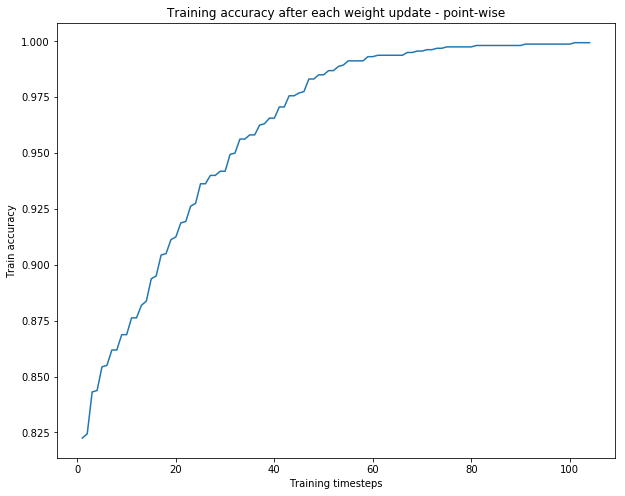

Current random weights:

[ 0.00167134 -0.00266353  0.04288131  0.0091681  -0.10995601 -0.08017784
 -0.0624427   0.02629475  0.03207199  0.09620446 -0.05842626  0.07540661
 -0.11161239  0.00102277  0.01412252  0.01391442 -0.0178312 ] 

Epochs: 16 

Learning Rate: 0.002 

____________________________________________________________________________________

Accuracy before training 0.224375
Training model...


____________________________________________________________________________________

batch training acc: 0.998125
batch training acc: 0.99875
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Chang

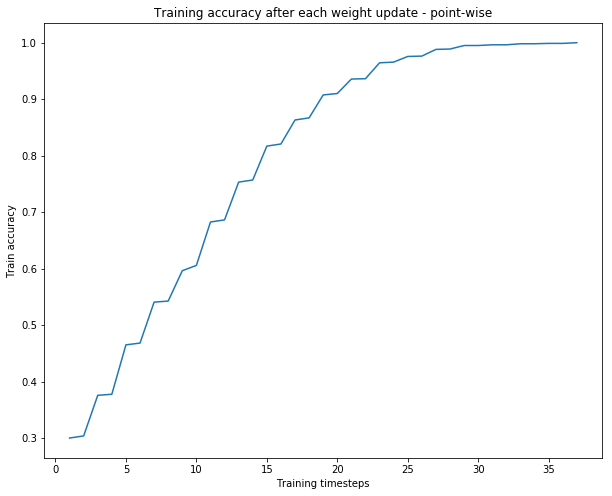

Current random weights:

[ 0.01159924 -0.12152791  0.0851195   0.0245758   0.03563858 -0.02745122
 -0.0322685   0.051626    0.15643065 -0.13711333 -0.14207582  0.02619079
 -0.03268373  0.01221023 -0.00234053  0.06119681 -0.02815438] 

Epochs: 16 

Learning Rate: 0.001 

____________________________________________________________________________________

Accuracy before training 0.431875
Training model...


____________________________________________________________________________________

batch training acc: 0.995
batch training acc: 0.9975
batch training acc: 0.99875
batch training acc: 0.999375
batch training acc: 0.999375
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
_________________________________________________________________________________

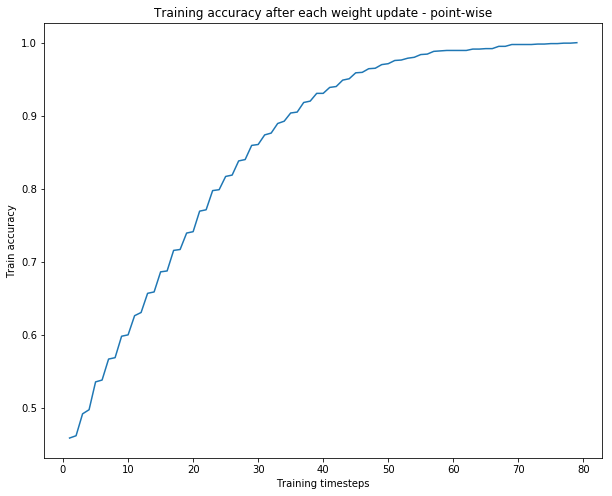

Current random weights:

[-0.07488184 -0.0489531  -0.00994438 -0.07777982 -0.00228411  0.00376542
 -0.02217574  0.01296705 -0.10004881 -0.0590759  -0.07082152  0.05453124
  0.14293007 -0.05459092 -0.0145797  -0.04297695  0.01371097] 

Epochs: 16 

Learning Rate: 0.01 

____________________________________________________________________________________

Accuracy before training 0.00375
Training model...


____________________________________________________________________________________

batch training acc: 0.999375
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed wei

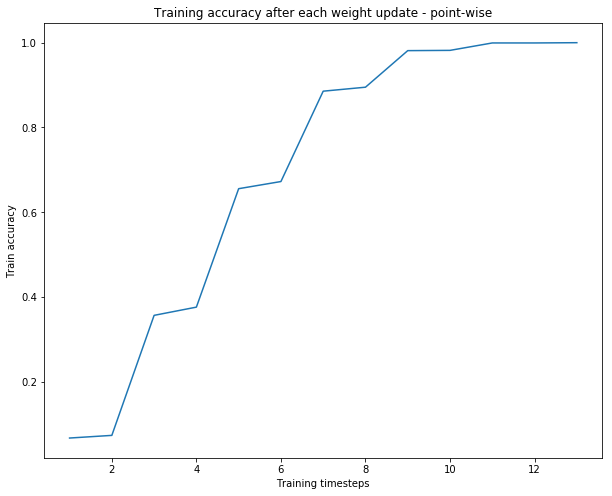

Current random weights:

[-0.07647588  0.03554493  0.08359266 -0.15383261  0.03412887 -0.22550964
 -0.03224586 -0.04068605 -0.02880212 -0.03922544 -0.06221146 -0.03340835
  0.02993348  0.03346806  0.01448035 -0.07210017  0.13579639] 

Epochs: 16 

Learning Rate: 0.02 

____________________________________________________________________________________

Accuracy before training 0.010625
Training model...


____________________________________________________________________________________

batch training acc: 0.999375
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed we

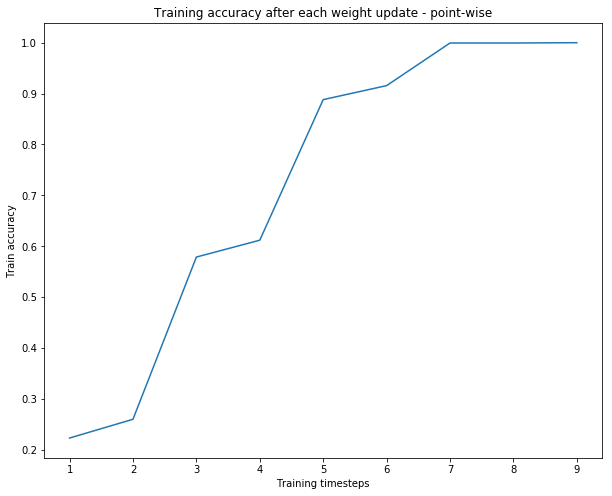

Current random weights:

[ 0.12548994 -0.10599698  0.01351431 -0.03851372  0.07614833 -0.00103612
  0.00437491  0.04072067 -0.02447833  0.13800524  0.04193595  0.07664272
 -0.01814496 -0.01010725  0.06677183  0.05850849 -0.10272712] 

Epochs: 16 

Learning Rate: 0.1 

____________________________________________________________________________________

Accuracy before training 0.989375
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights 

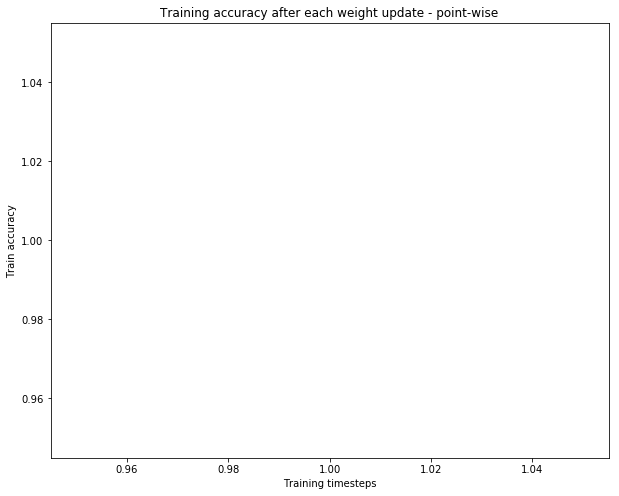

Current random weights:

[ 0.00884349  0.03283159 -0.00902836  0.02625538 -0.006097   -0.15567435
 -0.09082991  0.06755536 -0.01693278  0.01314343 -0.00025337 -0.05718381
 -0.03236324  0.02279247  0.02986314  0.15163195 -0.03310211] 

Epochs: 16 

Learning Rate: 0.2 

____________________________________________________________________________________

Accuracy before training 0.45875
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights [

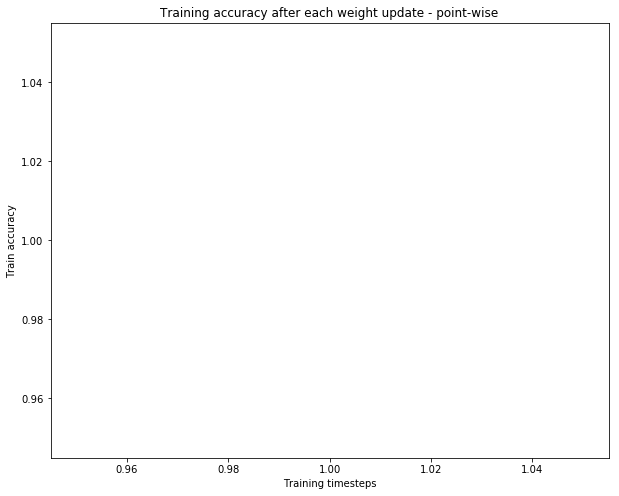

Current random weights:

[ 0.14023705 -0.07222508  0.04101415  0.01493101 -0.01056543 -0.00047498
 -0.05226364  0.0758757  -0.07073092  0.02665381  0.06344838  0.11619299
  0.08157242  0.04805096 -0.0535326  -0.06595966 -0.09557477] 

Epochs: 16 

Learning Rate: 0.5 

____________________________________________________________________________________

Accuracy before training 0.91125
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights [

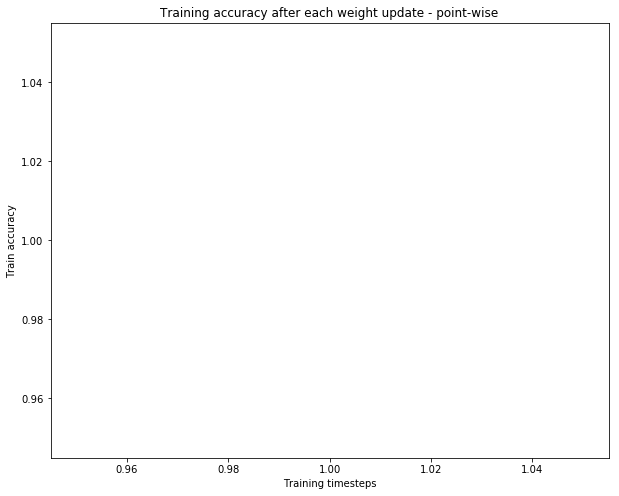

Current random weights:

[ -9.94135122e-02  -1.13087788e-04  -5.85895378e-02   9.65912322e-02
  -4.66322700e-02   7.59180526e-03  -2.13156448e-02  -1.13073233e-01
   8.77486516e-02   5.60173745e-02   6.52832337e-02   4.79197820e-02
  -6.11724710e-02  -5.96069992e-02   3.64051951e-02   1.24273946e-01
   3.10885427e-02] 

Epochs: 16 

Learning Rate: 0.75 

____________________________________________________________________________________

Accuracy before training 0.6575
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
________________

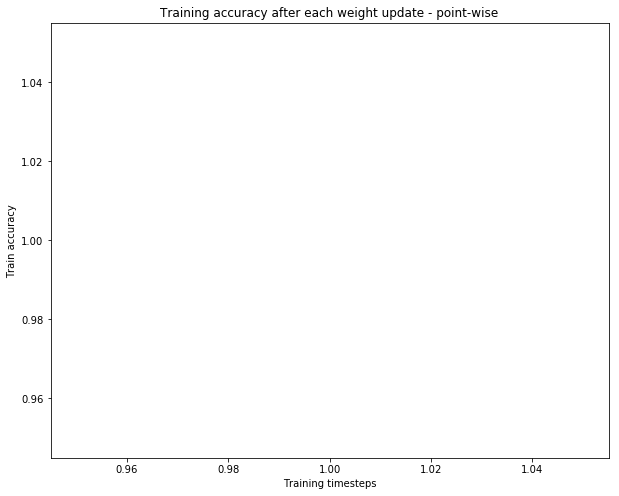

Current random weights:

[ 0.05075402 -0.02727751  0.05694659 -0.02175823  0.0124573  -0.01899313
  0.0461214   0.04682714 -0.07660207  0.06874449  0.12326666 -0.01843145
 -0.00657732  0.06429043  0.00346329 -0.00020615  0.09839761] 

Epochs: 16 

Learning Rate: 1.0 

____________________________________________________________________________________

Accuracy before training 0.97875
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights [

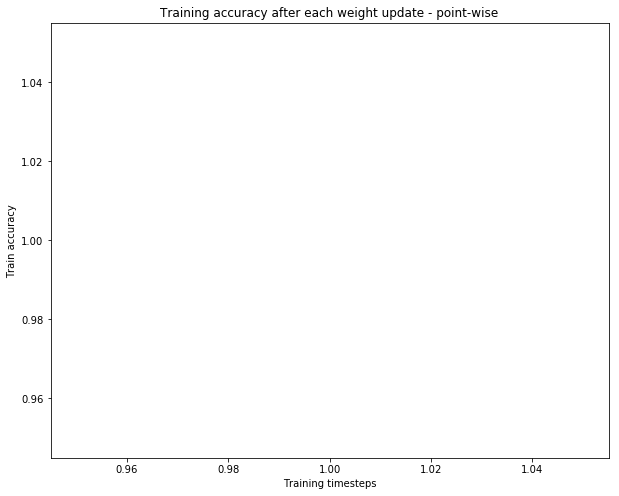

Current random weights:

[-0.1040322  -0.06060529  0.03209565 -0.12440755 -0.02865321 -0.02935658
  0.07387998  0.05322246 -0.12929942 -0.05324323 -0.05300762 -0.01663657
 -0.0843096   0.03469396 -0.05332494  0.04521581 -0.00021925] 

Epochs: 16 

Learning Rate: 1.5 

____________________________________________________________________________________

Accuracy before training 0.0
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights [0.04

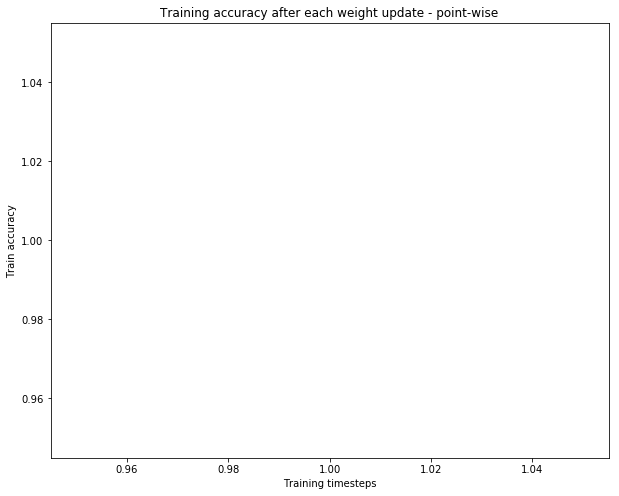

Current random weights:

[-0.06701383  0.09560801  0.09763613  0.01999553 -0.01647368 -0.07274487
  0.07376554  0.05665362 -0.05605835 -0.04729949  0.03146724 -0.08095057
 -0.04308983 -0.07166178 -0.06944204 -0.04958947  0.06239478] 

Epochs: 16 

Learning Rate: 2.0 

____________________________________________________________________________________

Accuracy before training 0.113125
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights 

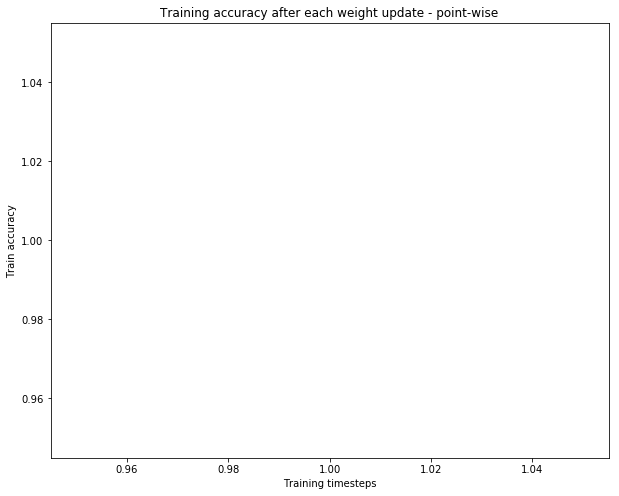

Current random weights:

[ -1.87274768e-01   4.62687474e-02   2.75324862e-02   1.03357965e-01
   2.74365996e-02  -4.04361169e-02  -8.70235933e-02   1.05713424e-01
   5.30426740e-02  -5.26357477e-02   9.70143760e-02  -4.75916370e-02
  -1.00531758e-04  -6.45206880e-02   5.69806042e-02  -1.06116855e-01
  -3.18704166e-02] 

Epochs: 16 

Learning Rate: 2.5 

____________________________________________________________________________________

Accuracy before training 0.371875
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
_______________

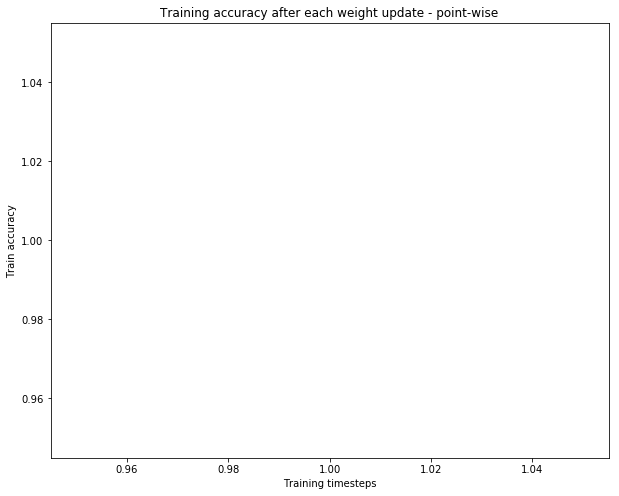

Current random weights:

[-0.05113754  0.02060271  0.03035093 -0.08626346  0.03175278 -0.1153702
  0.17124967 -0.03995924  0.08197433  0.01571629  0.01889047 -0.09110046
  0.06589449  0.0038006   0.03673004 -0.00708713  0.01015972] 

Epochs: 16 

Learning Rate: 3.0 

____________________________________________________________________________________

Accuracy before training 0.696875
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights [

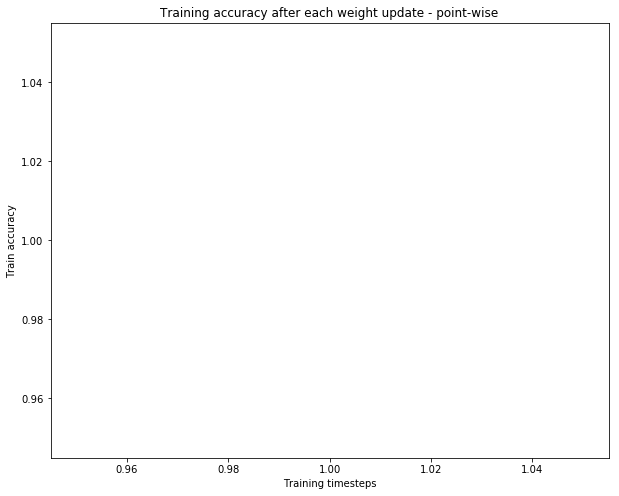

Current random weights:

[-0.11757677 -0.02026264 -0.05564788 -0.09350929  0.01782868  0.04815964
  0.03323479 -0.01355261  0.05448425  0.032094    0.01292527  0.02201998
  0.15678328 -0.15970829 -0.04222352  0.04481825 -0.20975984] 

Epochs: 16 

Learning Rate: 4.0 

____________________________________________________________________________________

Accuracy before training 0.416875
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights 

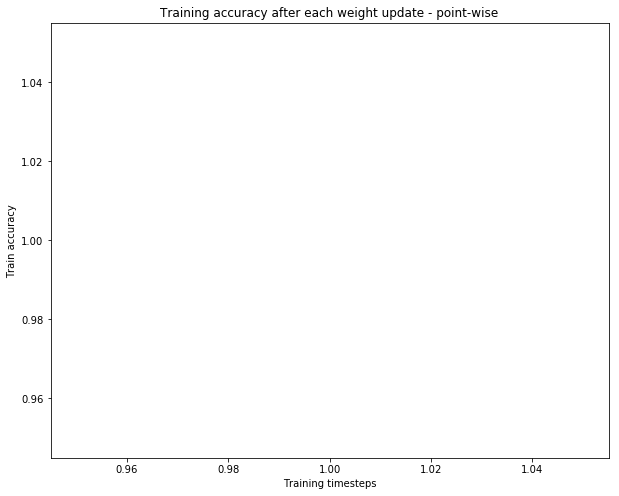

Current random weights:

[ 0.06217726  0.01145961  0.04303356  0.05035767  0.01854874 -0.10040368
  0.00664207  0.00952893 -0.04887832 -0.08048477  0.02076208 -0.05617829
  0.09270557  0.01183375  0.06077987  0.00140147  0.03379803] 

Epochs: 16 

Learning Rate: 5.0 

____________________________________________________________________________________

Accuracy before training 0.785
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights [0.

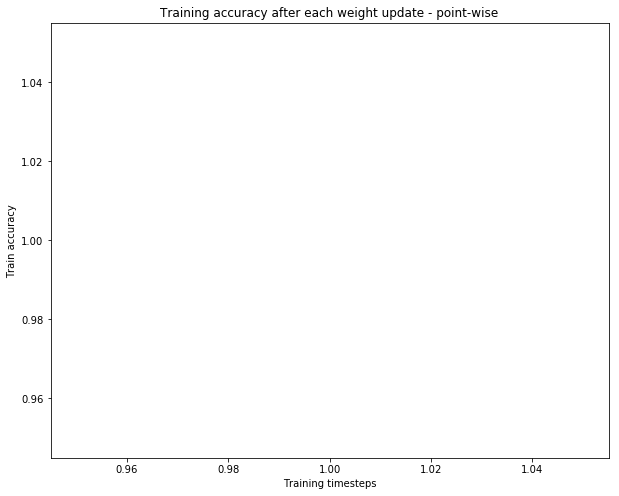

Current random weights:

[ 0.00260039  0.0490929  -0.09951304  0.04336011  0.03264962 -0.00752581
 -0.01997572 -0.01460242  0.01380492  0.0592704  -0.02607956 -0.08308167
  0.12129929  0.03278682 -0.01909927  0.05804047  0.0455837 ] 

Epochs: 16 

Learning Rate: 7.5 

____________________________________________________________________________________

Accuracy before training 0.85
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights [0.0

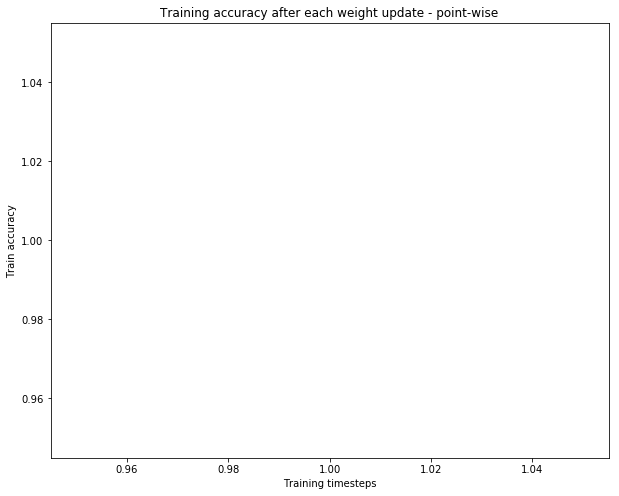

Current random weights:

[ 0.05547636 -0.05375999  0.07520202  0.12278474 -0.19383871  0.02529882
  0.03360206  0.02998475  0.00520453  0.13366114 -0.02381376 -0.0003139
  0.03557301 -0.02006704 -0.15619148  0.02413078  0.02540717] 

Epochs: 16 

Learning Rate: 10.0 

____________________________________________________________________________________

Accuracy before training 0.70625
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights [

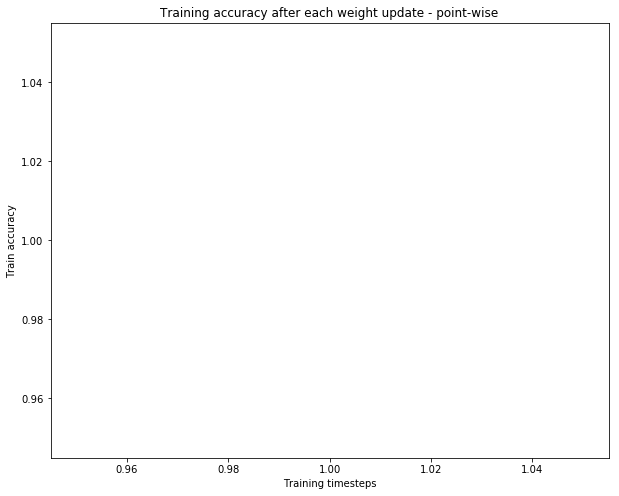

Current random weights:

[-0.01622094 -0.00587754 -0.14125251  0.05367841  0.04002452 -0.05942759
 -0.03000482  0.06434454 -0.05129944  0.02125354 -0.0218558   0.01821885
  0.00222717 -0.0125814   0.01725847 -0.02190157 -0.07925712] 

Epochs: 16 

Learning Rate: 20.0 

____________________________________________________________________________________

Accuracy before training 0.17375
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights 

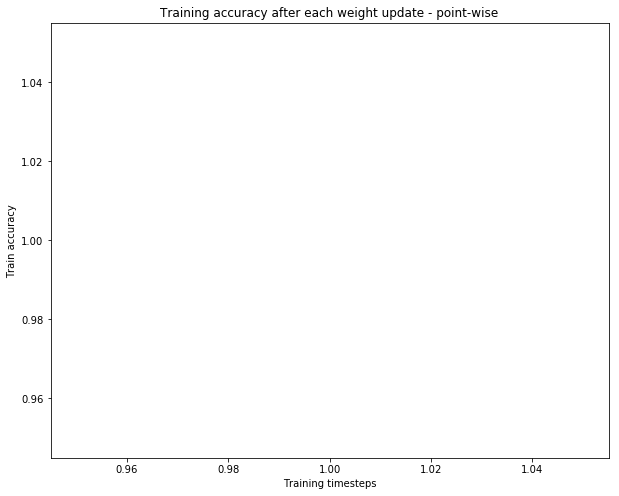

Current random weights:

[-0.07647053 -0.08637316 -0.13222474  0.030449   -0.01424086  0.02917474
  0.04292462  0.0623544   0.03354185 -0.08074742  0.04776928  0.01828298
  0.18052651  0.00065269  0.03156176 -0.00781631  0.0040304 ] 

Epochs: 16 

Learning Rate: 25.0 

____________________________________________________________________________________

Accuracy before training 0.678125
Training model...


____________________________________________________________________________________

batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
batch training acc: 1.0
training finished!
____________________________________________________________________________________

Changed weights

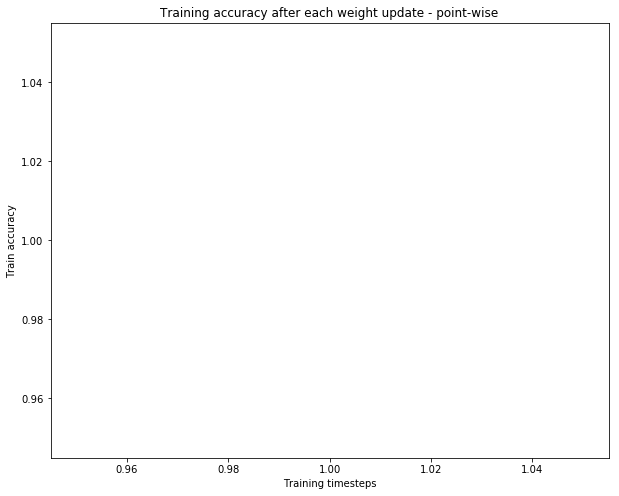

In [17]:
normalise_wt = True
acc_vectors = []
test_accs = []
for learning_rate in learning_rates: 
    n_epochs = 16
    pl = PerceptronAlgorithm(learning_rate=learning_rate, n_epochs=n_epochs, normalise_wt=normalise_wt)
    acc_data = pl.train(train)
    acc_vectors.append(acc_data)
    test_acc = pl.pred_batch(test)
    test_accs.append(test_acc)
    print "Testing accuracy:", test_acc
    beautify()
    print "length of acc vector: tell you about the number of updates made by the model", len(acc_data)
    beautify()
    plt.plot(range(1, len(acc_data)+1), acc_data)
    plt.xlabel('Training timesteps')
    plt.ylabel('Train accuracy')
    plt.title('Training accuracy after each weight update - point-wise')
    plt.show()
acc_vectors_w = acc_vectors
test_accs_w = test_accs

In [18]:
map(len, acc_vectors_w)

[104, 37, 79, 13, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [19]:
map(len, acc_vectors_wn)

[923, 422, 455, 37, 53, 13, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

### Check if accuracy while updating oscillates

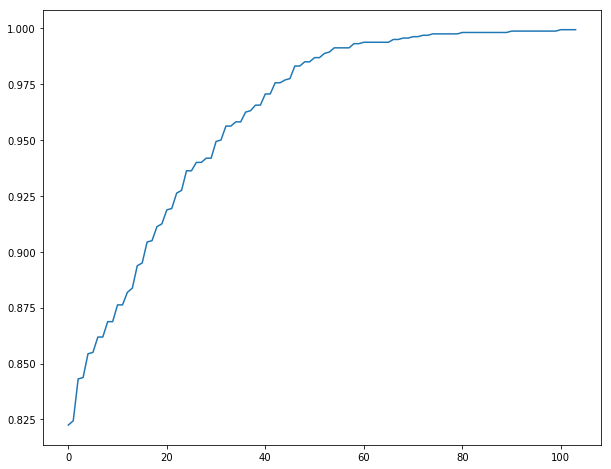

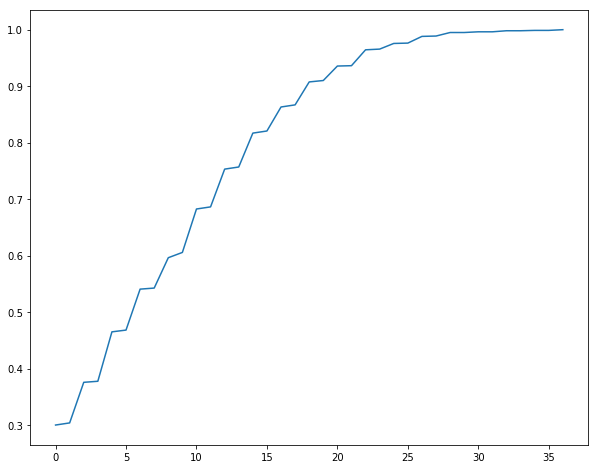

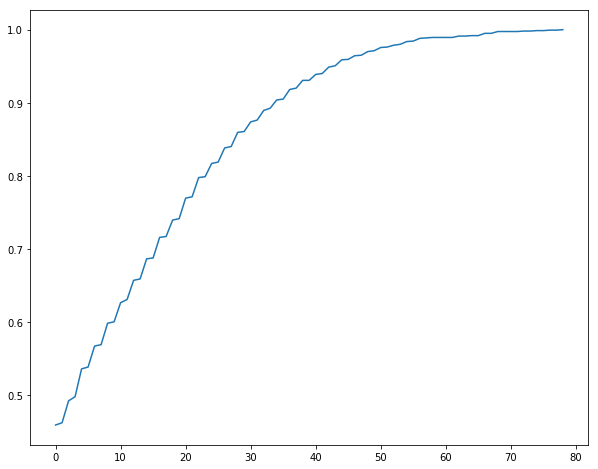

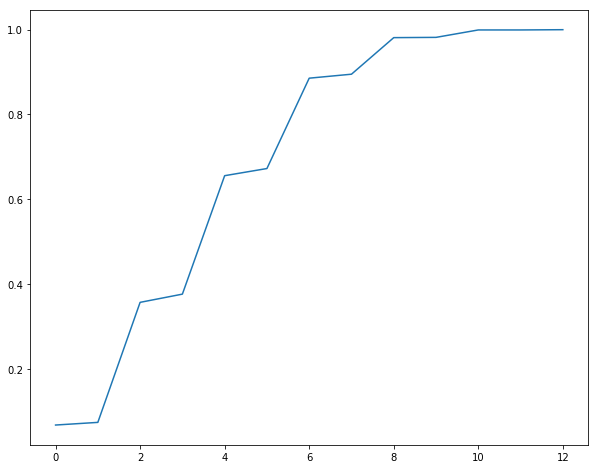

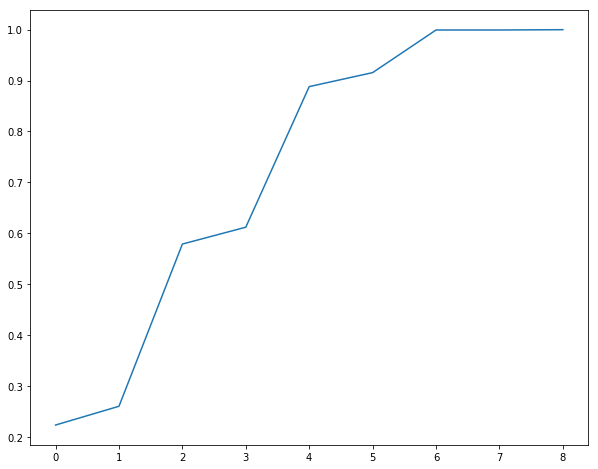

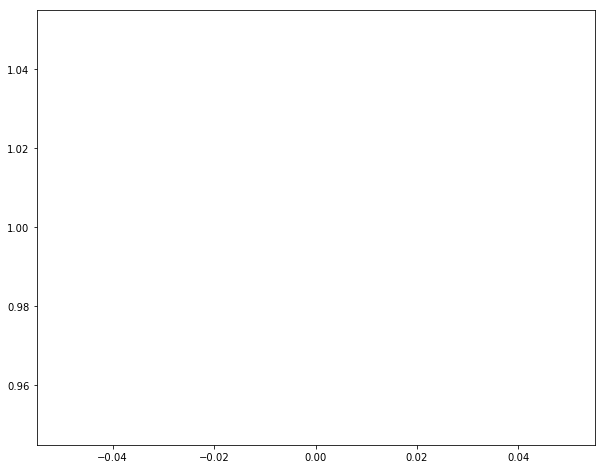

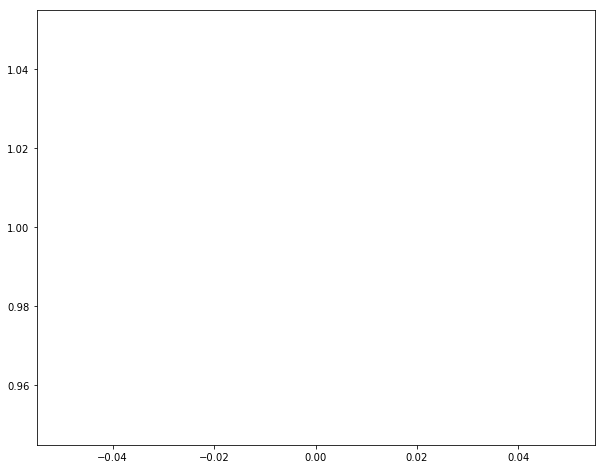

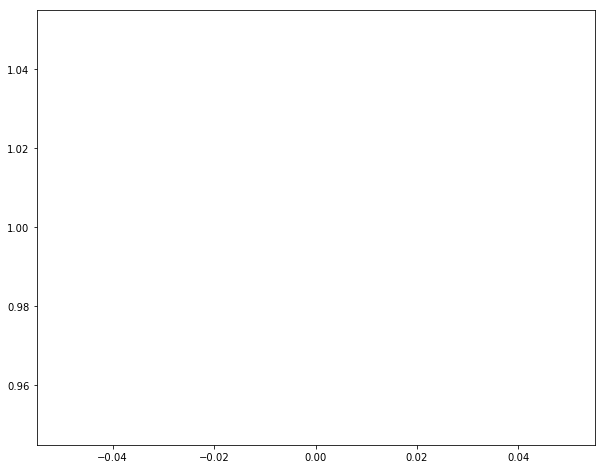

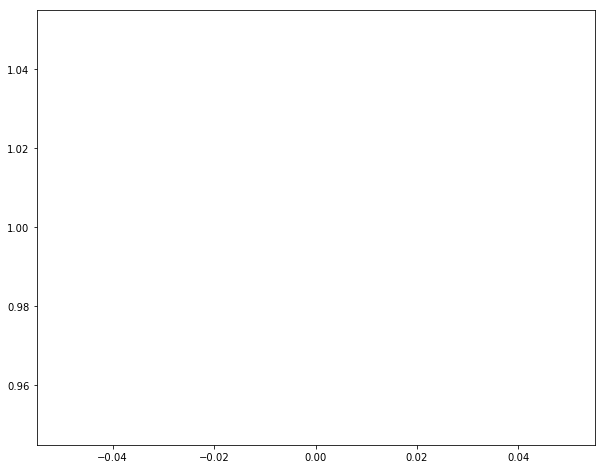

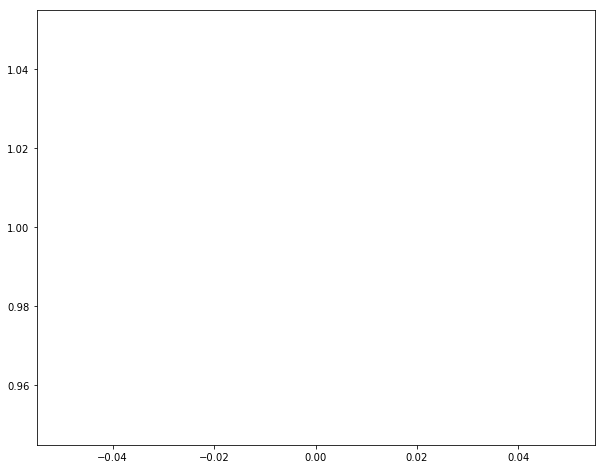

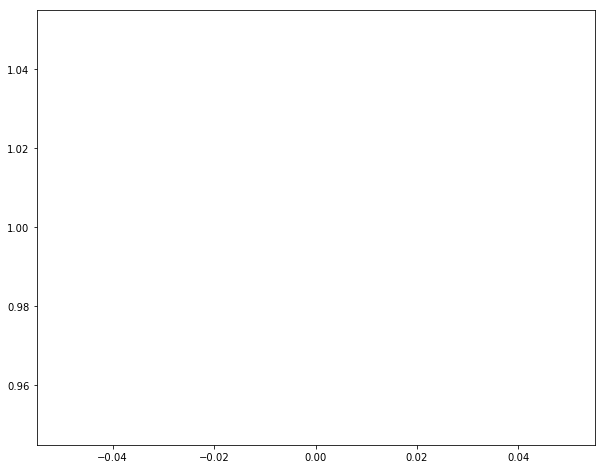

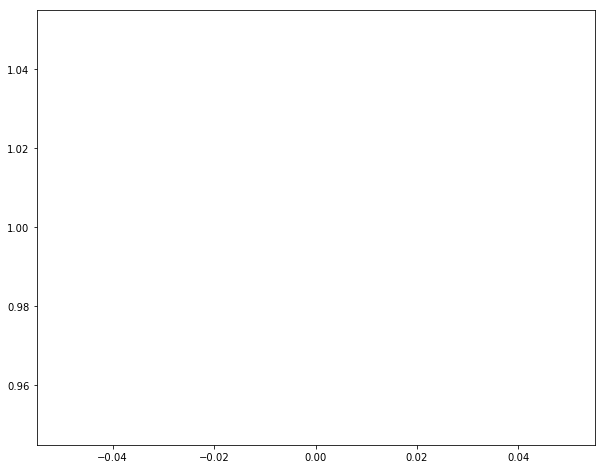

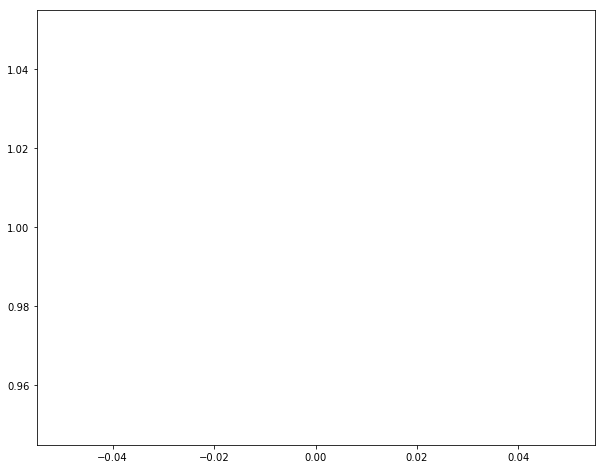

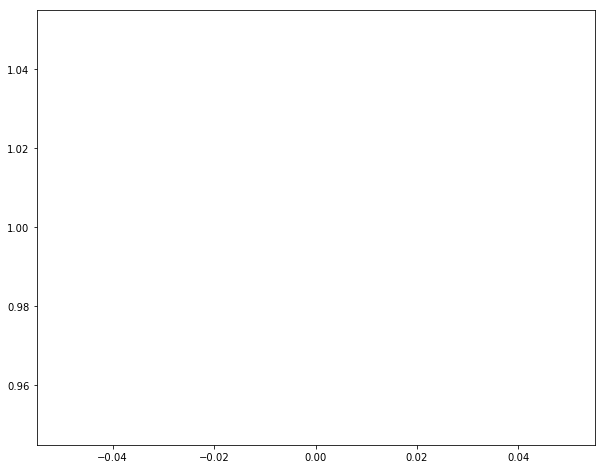

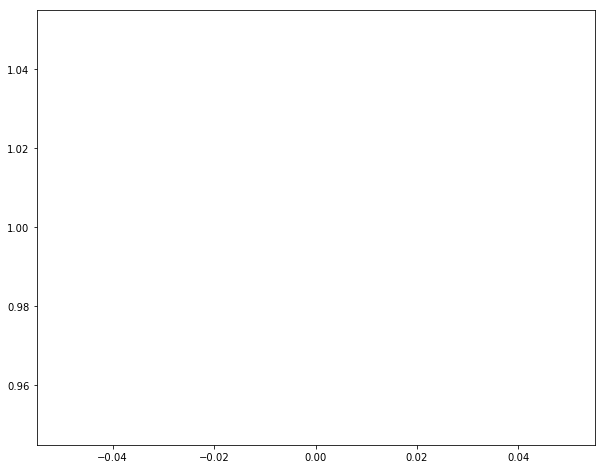

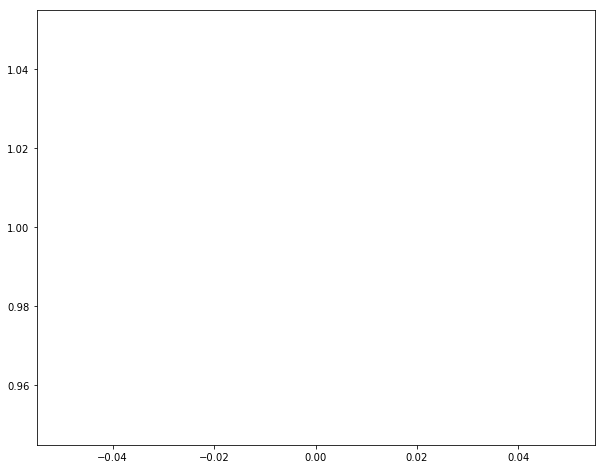

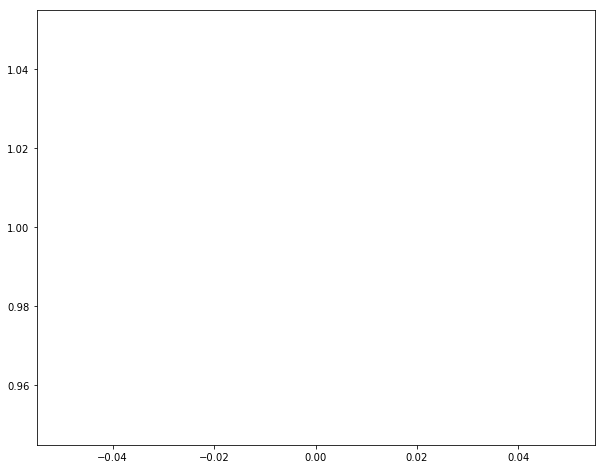

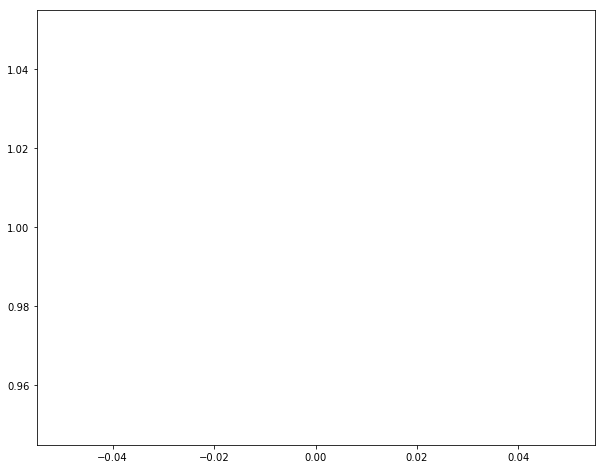

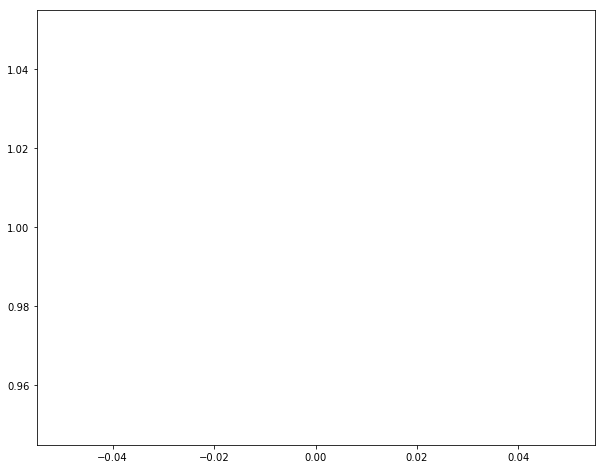

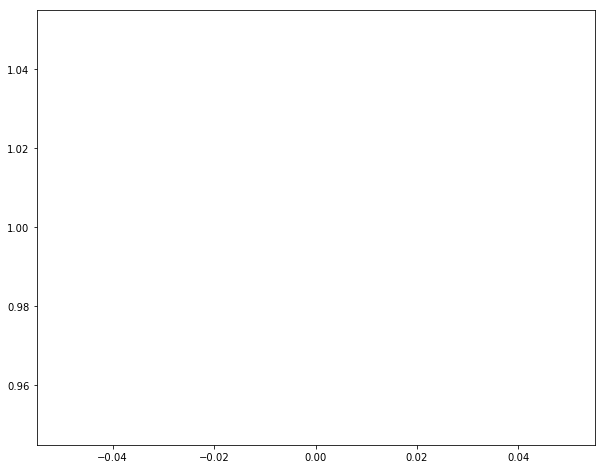

In [20]:
for x in acc_vectors_w:
    plt.plot(x)
    plt.show()

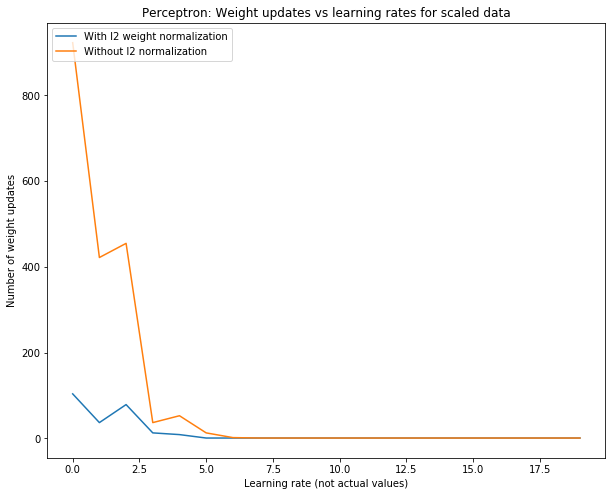

In [21]:
plt.plot(range(len(learning_rates)), map(len, acc_vectors_w))
plt.plot(range(len(learning_rates)), map(len, acc_vectors_wn))
plt.legend(['With l2 weight normalization', 'Without l2 normalization'], loc='upper left')
plt.xlabel('Learning rate (not actual values)')
plt.ylabel('Number of weight updates')
plt.title('Perceptron: Weight updates vs learning rates for scaled data')
plt.show()

# Hypothesis true atleast for this dataset!